[서울시 본청 업무추진비 목록> 데이터셋> 공공데이터 | 서울열린데이터광장](https://data.seoul.go.kr/dataList/OA-22156/S/1/datasetView.do)



## 분석에 사용할 Pandas 주요기능
* Pandas cheat sheet 를 함께 보세요! : [Pandas_Cheat_Sheet.pdf](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

* 파일 불러오기
    * to_csv("파일명", index=False) : csv 파일로 저장하기
    * read_csv("파일명") : csv 파일 불러오기
    
* Pandas를 통한 파일 저장과 불러오기
    * shape를 통한 행과 열의 수 보기
    * head, tail, sample 을 통한 일부 데이터 가져오기
    
* DataFrame의 info(), describe() 등을 통한 요약과 기술통계 값 구하기
    * info()
    * describe()
    * nunique()
    * index
    * columns
    * values
    
* Pandas의  DataFrame과 Series의 이해
    * Series : 1차원 벡터구조
    * DataFrame : 2차원 행렬구조
    
* 색인하기
    * [컬럼]
    * .loc[행]
    * .loc[행, 열]
    * .loc[조건식, 열]
    
* DataFrame의 데이터 타입 이해하기
    * 날짜 데이터의 변환
    
* DataFrame 다루기
    * 열(column) 인덱싱
    * 행(index) 인덱싱
    * 행, 열 인덱싱
    * 정렬하기 : sort_values 사용하기
    * 조건식 사용하기

* 빈도수 구하기
    * 한 개의 변수 : series.value_counts()
    * 두 개의 변수 : pd.crosstab()

## 라이브러리 로드

In [1]:
import re
import pandas as pd
import seaborn as sns
import koreanize_matplotlib
import matplotlib.pyplot as plt

## 파일 불러오기
<img src="https://pandas.pydata.org/docs/_images/02_io_readwrite.svg">

https://bit.ly/seoul-expense-24

In [2]:
# 데이터 로드

# df = pd.read_csv("data/seoul-expense.csv", encoding="cp949")
df = pd.read_csv("https://bit.ly/seoul-expense-24", encoding="cp949")
df.shape

(51428, 18)

In [3]:
df.head(2)

,문서고유id,제목,부서명,전화번호,작성자,등록일,해당년도,해당월,문서url,구분(시장실만 사용),전체부서명,집행일시,집행장소,집행목적,집행대상,결제방법,집행금액,비목
0,30267889,2023년 12월 서울시본청 주택정책실 주택공급기획관 공동주택지원과 업무추진비 - ...,공동주택지원과,02-2133-7134,박혜은,2024-02-02,2023,12,https://opengov.seoul.go.kr/expense/30267889,NaN,주택정책실 주택공급기획관 공동주택지원과,2023-12-20 11:45,서궁(종로구 새문안로 35-20),주택재건축 정비계획 결정 및 정비구역 지정 관련 간담회 비용 지급,공동주택지원과장 외 2명,카드,29570,부서
1,30267889,2023년 12월 서울시본청 주택정책실 주택공급기획관 공동주택지원과 업무추진비 - ...,공동주택지원과,02-2133-7134,박혜은,2024-02-02,2023,12,https://opengov.seoul.go.kr/expense/30267889,NaN,주택정책실 주택공급기획관 공동주택지원과,2023-12-14 13:15,잼배옥(중구 서소문동 64-4),공동주택 장기수선 제도개선 방안 수립용역 준공 관련 간담회 비용 지급(2),공동주택지원과장 외 4명,카드,14000,부서


In [4]:
# tail()
df.tail()

,문서고유id,제목,부서명,전화번호,작성자,등록일,해당년도,해당월,문서url,구분(시장실만 사용),전체부서명,집행일시,집행장소,집행목적,집행대상,결제방법,집행금액,비목
51423,30247797,2024년 1월 서울시본청 주택정책실 지역건축안전센터 업무추진비 - 시책추진 부서운영,주택정책실 지역건축안전센터,02-2133-6984,김혜원,2024-01-31,2024,1,https://opengov.seoul.go.kr/expense/30247797,NaN,주택정책실 지역건축안전센터,2024-01-11 12:08,삼우정(중구 서소문로 134),건축물 화재안전 성능보강 지원사업 관련 간담회 비용 지급,지역건축안전센터장 외 5명,카드,76000,시책
51424,30247797,2024년 1월 서울시본청 주택정책실 지역건축안전센터 업무추진비 - 시책추진 부서운영,주택정책실 지역건축안전센터,02-2133-6984,김혜원,2024-01-31,2024,1,https://opengov.seoul.go.kr/expense/30247797,NaN,주택정책실 지역건축안전센터,2024-01-07 19:49,라밥(LABAB)(중구 세종대로 76),현안 업무 추진 보고 관련 간담회 비용 지급,지역건축안전센터장 외 2명,카드,21000,시책
51425,30247797,2024년 1월 서울시본청 주택정책실 지역건축안전센터 업무추진비 - 시책추진 부서운영,주택정책실 지역건축안전센터,02-2133-6984,김혜원,2024-01-31,2024,1,https://opengov.seoul.go.kr/expense/30247797,NaN,주택정책실 지역건축안전센터,2024-01-05 12:05,오리마당(중구 세종대로 92),부서 직원 격려 간담회 비용 지급,지역건축안전센터장 외 10명,카드,148000,부서
51426,30247797,2024년 1월 서울시본청 주택정책실 지역건축안전센터 업무추진비 - 시책추진 부서운영,주택정책실 지역건축안전센터,02-2133-6984,김혜원,2024-01-31,2024,1,https://opengov.seoul.go.kr/expense/30247797,NaN,주택정책실 지역건축안전센터,2024-01-04 12:19,삼우정(중구 서소문로 134),해체공사장 안전관리 강화 대책 관련 간담회 비용 지급,지역건축안전센터장 외 11명,카드,190000,시책
51427,30247797,2024년 1월 서울시본청 주택정책실 지역건축안전센터 업무추진비 - 시책추진 부서운영,주택정책실 지역건축안전센터,02-2133-6984,김혜원,2024-01-31,2024,1,https://opengov.seoul.go.kr/expense/30247797,NaN,주택정책실 지역건축안전센터,2024-01-03 12:17,삼우정(중구 서소문로 134),신년 업무 보고 관련 간담회 비용 지급,지역건축안전센터장 외 5명,카드,76000,시책


In [5]:
# sample()
df.sample()

,문서고유id,제목,부서명,전화번호,작성자,등록일,해당년도,해당월,문서url,구분(시장실만 사용),전체부서명,집행일시,집행장소,집행목적,집행대상,결제방법,집행금액,비목
15118,29234635,2023년 8월 서울시본청 평생교육국 교육지원정책과 업무추진비 - 기관운영 시책추진...,교육지원정책과,2133-3915,정다은,2023-09-11,2023,8,https://opengov.seoul.go.kr/expense/29234635,NaN,평생교육국 교육지원정책과,2023-08-21 19:01,농민백암순대(중구 남대문로1길 33),가정밖 청소년에 대한 지원 확대 요청 민원 검토 관련 간담회 비용 지급,평생교육국장 등 3명,카드,43000,시책


## 기본 정보

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51428 entries, 0 to 51427
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   문서고유id       51428 non-null  int64 
 1   제목           51428 non-null  object
 2   부서명          51428 non-null  object
 3   전화번호         51428 non-null  object
 4   작성자          51428 non-null  object
 5   등록일          51428 non-null  object
 6   해당년도         51428 non-null  int64 
 7   해당월          51428 non-null  int64 
 8   문서url        51428 non-null  object
 9   구분(시장실만 사용)  717 non-null    object
 10  전체부서명        51428 non-null  object
 11  집행일시         51428 non-null  object
 12  집행장소         51206 non-null  object
 13  집행목적         51428 non-null  object
 14  집행대상         51316 non-null  object
 15  결제방법         51428 non-null  object
 16  집행금액         51428 non-null  int64 
 17  비목           51428 non-null  object
dtypes: int64(4), object(14)
memory usage: 7.1+ MB


In [7]:
df.isnull().sum()

문서고유id             0
제목                 0
부서명                0
전화번호               0
작성자                0
등록일                0
해당년도               0
해당월                0
문서url              0
구분(시장실만 사용)    50711
전체부서명              0
집행일시               0
집행장소             222
집행목적               0
집행대상             112
결제방법               0
집행금액               0
비목                 0
dtype: int64

<Axes: >

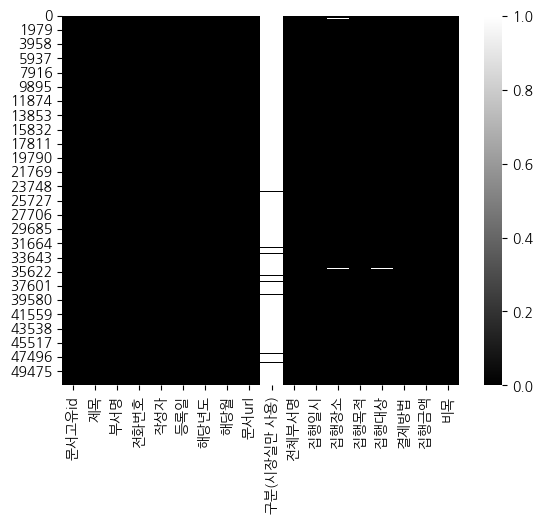

In [8]:
sns.heatmap(df.isnull(), cmap="gray")

## 기초 기술 통계

In [9]:
df.describe().round(2)

,문서고유id,해당년도,해당월,집행금액
count,51428.00,51428.00,51428.00,51428.00
mean,29053914.24,2023.08,6.20,127246.27
std,780336.54,0.26,3.69,286999.45
min,27741766.00,2023.00,1.00,0.00
25%,28396801.00,2023.00,3.00,55000.00
50%,29028993.00,2023.00,6.00,90000.00
75%,29802955.00,2023.00,9.00,150000.00
max,30350224.00,2024.00,12.00,45526140.00


In [10]:
df.describe(include="object")

,제목,부서명,전화번호,작성자,등록일,문서url,구분(시장실만 사용),전체부서명,집행일시,집행장소,집행목적,집행대상,결제방법,비목
count,51428,51428,51428,51428,51428,51428,717,51428,51428,51206,51428,51316,51428,51428
unique,2213,252,330,300,222,2213,2,253,35538,18109,34927,10300,3,4
top,2023년 12월 서울시본청 행정국 총무과 업무추진비 - 전체,총무과,02-2133-6412,김두영,2023-04-10,https://opengov.seoul.go.kr/expense/30115434,시정 관련 간담회 등,행정국 총무과,1970-01-01 09:00,삼우정(중구 서소문로 134-12),기강감찰 행정소요경비 지급,디자인정책관 외 3명,카드,시책
freq,285,3086,1893,2048,1353,285,377,3227,18,287,376,124,37336,39320


## 파생변수 만들기
* 월, 일, 요일

In [11]:
df["집행일시"] = pd.to_datetime(df["집행일시"])
df["집행연도"] = df["집행일시"].dt.year
df["집행월"] = df["집행일시"].dt.month
df["집행일"] = df["집행일시"].dt.day
df["집행요일"] = df["집행일시"].dt.dayofweek

### 추가된 파생변수의 기술 통계

In [12]:
df.describe()

,문서고유id,해당년도,해당월,집행일시,집행금액,집행연도,집행월,집행일,집행요일
count,5.142800e+04,51428.000000,51428.000000,51428,5.142800e+04,51428.000000,51428.000000,51428.000000,51428.000000
mean,2.905391e+07,2023.075815,6.201505,2023-07-13 22:24:10.147779584,1.272463e+05,2023.057245,6.199872,16.009722,2.092965
min,2.774177e+07,2023.000000,1.000000,1970-01-01 09:00:00,0.000000e+00,1970.000000,1.000000,1.000000,0.000000
25%,2.839680e+07,2023.000000,3.000000,2023-04-11 12:50:45,5.500000e+04,2023.000000,3.000000,9.000000,1.000000
50%,2.902899e+07,2023.000000,6.000000,2023-07-19 13:22:30,9.000000e+04,2023.000000,6.000000,16.000000,2.000000
75%,2.980296e+07,2023.000000,9.000000,2023-11-01 12:20:15,1.500000e+05,2023.000000,9.000000,23.000000,3.000000
max,3.035022e+07,2024.000000,12.000000,2024-01-31 21:57:00,4.552614e+07,2024.000000,12.000000,31.000000,6.000000
std,7.803365e+05,0.264704,3.685438,NaN,2.869994e+05,1.027473,3.685960,8.634498,1.415798


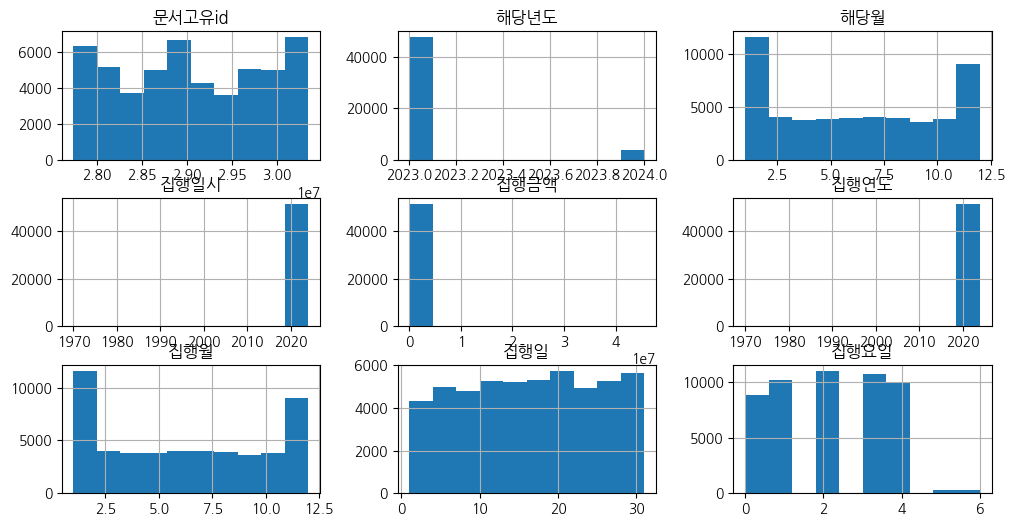

In [13]:
df.hist(figsize=(12, 6));

## 빈도 분석

In [14]:
# 집행 장소 빈도 구하기 value_counts()
df["집행장소"].value_counts().head(10)

집행장소
삼우정(중구 서소문로 134-12)             287
서울시청 간담회장(서울특별시 중구 세종대로 110)    208
오리마당(중구 세종대로 92)                182
우도일식(중구 세종대로 124)               169
삼우정(서울 중구 서소문로 134-12)          158
구이구이(중구 을지로 6)                  135
곰국시집(중구 무교로 24)                 126
곰국시집(서울 중구 무교로 24)              125
푸에르코 광화문(서울특별시 중구 무교로 21)       123
월매네남원추어탕(중구 서소문로 109-8)         113
Name: count, dtype: int64

## 문자열 파생변수 만들기

In [15]:
# 상호명만 추출하여 새로운 열에 저장
df['상호명'] = df['집행장소'].str.extract(r'([^\(\)]+)\(')

df["상호명"].value_counts().head(20)

상호명
삼우정          609
우도일식         435
오리마당         395
구이구이         373
곰국시집         342
브이아이피참치      338
서울시청 간담회장    318
창고43         313
서울시청매점       294
참숯골          263
푸에르코 광화문     254
무교소호정        247
배수사          246
차이           238
뚜리삼          230
배재반점         226
롯데쇼핑         213
월매네남원추어탕     213
잼배옥          210
아리연          210
Name: count, dtype: int64

In [16]:
df["상호명"].value_counts()

상호명
삼우정                     609
우도일식                    435
오리마당                    395
구이구이                    373
곰국시집                    342
                       ... 
만선9                       1
디저트스토리                    1
㈜락희앤컴퍼니 을지로지점             1
글래드 호텔앤리조트㈜ 글래드호텔여의도      1
진오봉참치                     1
Name: count, Length: 7831, dtype: int64

<Axes: xlabel='상호명'>

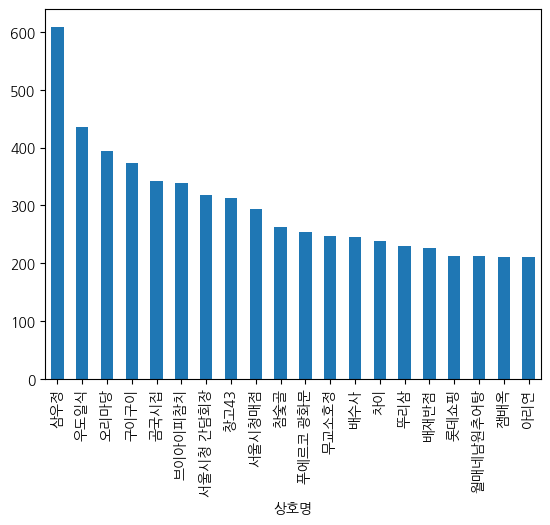

In [17]:
df["상호명"].value_counts().head(20).plot(kind="bar")

In [18]:
# 주소 추출 함수
def extract_address(place):
    match = re.search(r'\(([^)]+)(?=\))', str(place))
    if match:
        return match.group(1)
    else:
        return None


# '주소' 컬럼에 추출한 주소 추가
df['주소'] = df['집행장소'].apply(extract_address)
df['주소'].value_counts()

주소
주                    2208
중구 세종대로 136           657
중구 서소문로 124           595
중구 세종대로 124           536
서울특별시 중구 세종대로 136     518
                     ... 
준구 세종대로 70-1            1
중구 봉래동1가 7              1
서울시 남대문로7길 33           1
서울시 중구 다동길 33           1
강남구 테헤란로7길 22           1
Name: count, Length: 8906, dtype: int64

## 특정 데이터만 찾고 싶을 때
### Boolean Indexing 으로 여러 조건 비교하기

### 전처리 결과 확인
* loc 를 통한 데이터 확인

* 색인하기
    * [컬럼]
    * .loc[행]
    * .loc[행, 열]
    * .loc[조건식, 열]

In [19]:
df.loc[df["상호명"] == "", "집행장소"]

Series([], Name: 집행장소, dtype: object)

In [20]:
df["결제방법"].value_counts()

결제방법
카드      37336
제로페이    13620
현금        472
Name: count, dtype: int64

In [21]:
df["결제방법"].unique()

array(['카드', '제로페이', '현금'], dtype=object)

<Axes: >

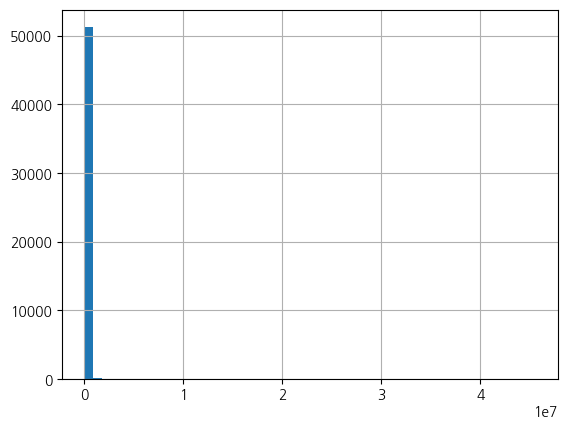

In [22]:
df["집행금액"].hist(bins=50)

In [23]:
df["집행금액"].describe().round(2)

count       51428.00
mean       127246.27
std        286999.45
min             0.00
25%         55000.00
50%         90000.00
75%        150000.00
max      45526140.00
Name: 집행금액, dtype: float64

In [24]:
df[df["집행금액"] > 40000000]

,문서고유id,제목,부서명,전화번호,작성자,등록일,해당년도,해당월,문서url,구분(시장실만 사용),...,집행대상,결제방법,집행금액,비목,집행연도,집행월,집행일,집행요일,상호명,주소
1048,30115407,2023년 12월 서울시본청 서울특별시장 업무추진비 - 기관운영 시책추진,시장실,02-2133-6033,전세용,2024-01-10,2023,12,https://opengov.seoul.go.kr/expense/30115407,현업-우수부서 격려 등,...,본청 167개 부서,카드,45526140,기관,2023,12,20,2,NaN,None


In [25]:
df_sub = df[df["집행금액"] < 10000000]

<Axes: >

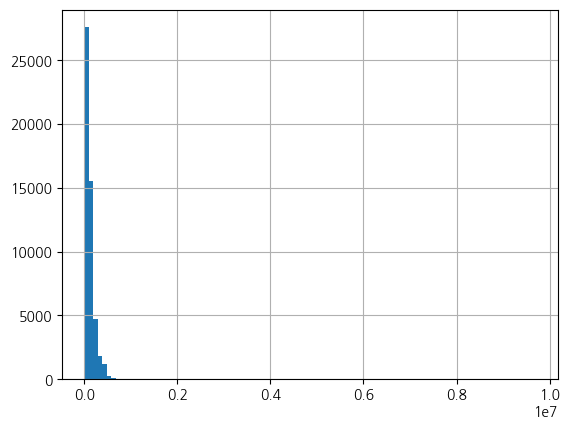

In [26]:
df_sub["집행금액"].hist(bins=100)

In [27]:
df["결제방법"].value_counts()

결제방법
카드      37336
제로페이    13620
현금        472
Name: count, dtype: int64

In [28]:
df["비목"].value_counts()

비목
시책    39320
부서     5952
기관     5799
정원      357
Name: count, dtype: int64

## 2개 이상의 변수에 대한 교차표 구하기

In [29]:
pd.crosstab(df["결제방법"], df["비목"]).style.format("{:,.0f}")

비목,기관,부서,시책,정원
결제방법,,,,
제로페이,980,"1,140","11,483",17
카드,"4,382","4,800","27,834",320
현금,437,12,3,20


In [30]:
pd.crosstab(df["결제방법"], df["비목"], values=df["집행금액"], aggfunc="mean").style.format("{:,.0f}")

비목,기관,부서,시책,정원
결제방법,,,,
제로페이,"219,911","192,095","104,928","111,453"
카드,"207,856","122,128","113,552","200,911"
현금,"397,967","213,683","102,167","200,611"


In [31]:
df["집행목적"].value_counts().head(20)

집행목적
기강감찰 행정소요경비 지급               376
시정 현안 관련 업무협의 간담회            192
시정 소통 협력을 위한 유관기관 관계자 간담회    177
시정 현안 관련 의견수렴 간담회            160
시책사업 추진 관련 의견수렴 간담회          146
업무 협의 비용 지급                  104
시정 현안 관련 유관기관 간담회             96
유관기관 등 업무협력 간담회               96
시책사업 추진 관련 업무협의 간담회           96
시정 소통 협력을 위한 언론 간담회           92
마케팅 전략 기획 관련 의견수렴 간담회         91
시정 유관기관 업무협력 간담회              87
시정 추진 유관기관 업무협력 간담회           86
현안 검토 관련 의견수렴 간담회             79
시책사업 관련 의견수렴 간담회              77
언론사 협력 시정정보제공 검토 간담회          76
현안업무추진 직원 격려 비용 지급            73
현안 관련 유관단체 간담회                72
공직기강 확립 관련 관계자 간담회            71
시정 소통 협력을 위한 의회 관계자 간담회       70
Name: count, dtype: int64

In [32]:
# 다른 변수로 교차표 구하기

mw = pd.crosstab(df["집행월"], df["집행요일"])
mw.columns = list("월화수목금토일")
mw.style.format("{:,.0f}").background_gradient(cmap="Greens")

,월,화,수,목,금,토,일
집행월,,,,,,,
1,"1,311","1,685","1,649","1,560","1,540",27,16
2,660,762,777,776,771,14,14
3,702,747,766,901,844,17,17
4,705,750,772,766,738,23,30
5,672,905,936,709,532,23,23
6,689,597,805,962,871,25,13
7,902,787,819,790,692,22,14
8,679,734,899,869,681,11,13
9,681,804,741,580,737,23,15


## groupby 활용하기

<img src="https://pandas.pydata.org/docs/_images/06_groupby_select_detail.svg">

* https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html#min-tut-06-stats

In [33]:
# 결제 방법, 집행 금액 기술 통계 및 연산
df.groupby("결제방법")["집행금액"].describe().style.format("{:,.0f}")

,count,mean,std,min,25%,50%,75%,max
결제방법,,,,,,,,
제로페이,"13,620","120,506","131,943",100,"58,000","89,000","144,000","5,280,000"
카드,"37,336","126,471","291,942","1,000","54,500","92,000","151,000","45,526,140"
현금,472,"383,039","1,291,238",0,"50,000","50,000","100,000","9,689,400"


* [Styling — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html)

In [34]:
df.groupby("결제방법")["집행금액"].describe().style.format("{:,.0f}").background_gradient(cmap="Greens")

,count,mean,std,min,25%,50%,75%,max
결제방법,,,,,,,,
제로페이,"13,620","120,506","131,943",100,"58,000","89,000","144,000","5,280,000"
카드,"37,336","126,471","291,942","1,000","54,500","92,000","151,000","45,526,140"
현금,472,"383,039","1,291,238",0,"50,000","50,000","100,000","9,689,400"


In [35]:
# 주요 상호별 결제 방법


* Fancy Indexing

<img src="http://scipy-lectures.org/_images/numpy_fancy_indexing.png" width="400" align="left">


* 이미지 출처 : http://scipy-lectures.org/intro/numpy/array_object.html#manual-construction-of-arrays

<img src="http://scipy-lectures.org/_images/numpy_indexing.png" width="300" align="left">

## 월별 지출액

In [36]:
df.groupby("집행월")["집행금액"].sum()

집행월
1     1077346924
2      461547226
3      475312243
4      435448819
5      445756073
6      468068588
7      478799266
8      445592380
9      480884240
10     444843200
11     506911959
12     823510345
Name: 집행금액, dtype: int64

<Axes: xlabel='집행월', ylabel='집행금액'>

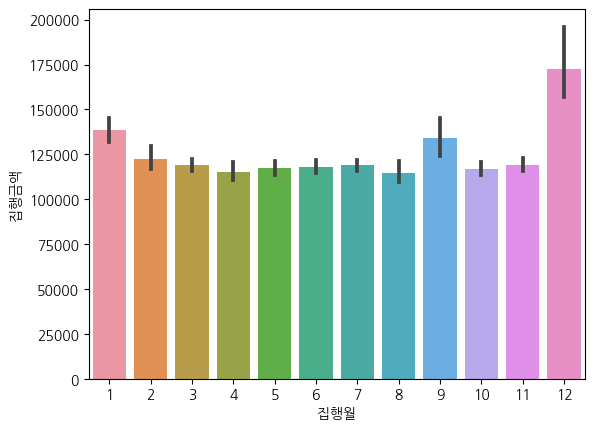

In [37]:
sns.barplot(data=df, x="집행월", y="집행금액")

In [38]:
month_dow = df.groupby(["집행월", "집행요일"])["집행금액"].sum().unstack()
month_dow.columns = list("월화수목금토일")
month_dow.style.format("{:,.0f}").background_gradient()

,월,화,수,목,금,토,일
집행월,,,,,,,
1,"192,300,879","218,329,450","235,648,265","197,815,092","227,199,732","5,036,006","1,017,500"
2,"83,282,850","90,276,966","95,484,130","92,495,060","97,908,405","947,700","1,152,115"
3,"85,313,851","86,740,015","90,437,746","111,035,934","95,944,861","3,154,437","2,685,399"
4,"80,115,995","83,349,850","87,799,064","87,352,930","92,007,280","2,113,500","2,710,200"
5,"75,760,493","105,519,838","111,583,386","87,296,563","61,984,473","1,702,220","1,909,100"
6,"79,421,818","71,843,060","92,761,080","119,338,415","99,565,027","3,901,672","1,237,516"
7,"110,181,350","93,081,690","101,404,696","93,501,260","76,815,670","2,867,000","947,600"
8,"72,395,790","77,064,300","110,382,700","105,324,190","78,821,800","918,450","685,150"
9,"88,203,718","110,043,162","109,095,060","70,188,514","100,179,418","1,878,737","1,295,631"


<Axes: >

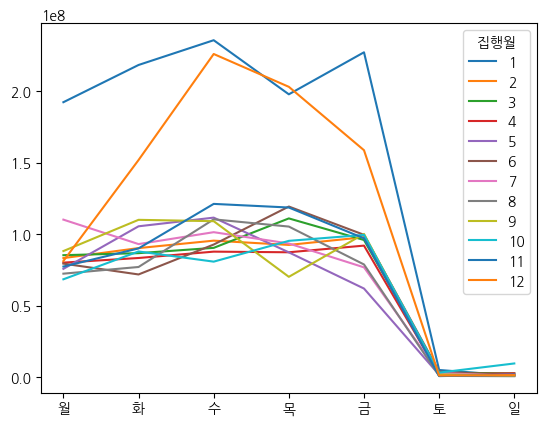

In [39]:
month_dow.T.plot()

In [40]:
# !apt -qq -y install fonts-nanum

import platform

# 운영체제에 따른 한글 폰트 경로 설정
if platform.system() == 'Windows':
    # Windows 운영체제의 경우
    font_path = r'C:\Windows\Fonts\malgun.ttf'
elif platform.system() == 'Darwin':
    # macOS의 경우
    font_path = r'/Library/Fonts/AppleGothic.ttf'
    font_path = r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
else:
    # Linux 또는 기타 운영체제의 경우 (예: 'NanumBarunGothic')
    font_path = r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

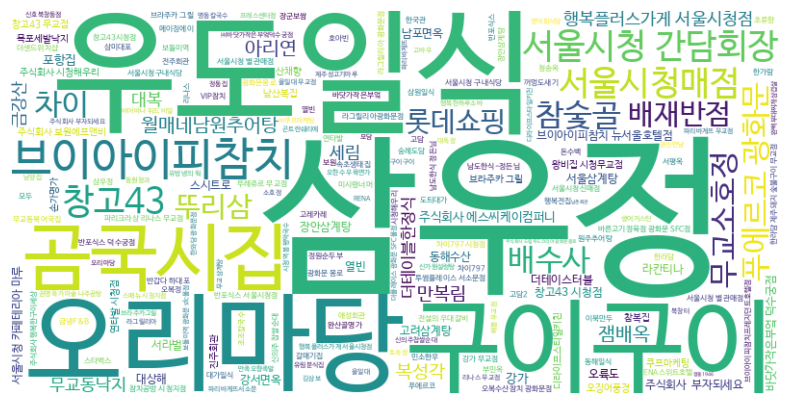

In [41]:
from wordcloud import WordCloud
# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path
                     ).generate_from_frequencies(df["상호명"].value_counts())

# 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

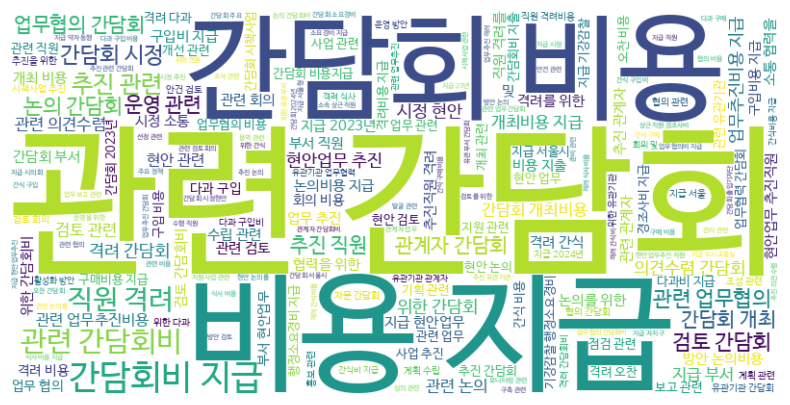

In [42]:
# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path
                     ).generate(" ".join(df["집행목적"].tolist()))

# 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [43]:
df["집행목적_전처리"] = df["집행목적"]
df.loc[df["집행목적"].str.contains("간담회"), "집행목적_전처리"] = "간담회"

In [44]:
df["집행목적_전처리"].value_counts()

집행목적_전처리
간담회                              35798
기강감찰 행정소요경비 지급                     376
업무 협의 비용 지급                        104
현안업무추진 직원 격려 비용 지급                  73
현안업무 관련 직원 격려                       55
                                 ...  
찾아가는 폭력 예방교육 운영 방안 논의비용 지급           1
일생활균형 문화 조성 방안 논의비용 지급               1
스토킹 예방 및 피해자 지원 방안 논의비용 지급           1
직장 내 성희롱 등 폭력예방 홍보 방안 논의비용 지급        1
상반기 부서 전출 직원 격려 다과 구매 비용(1)          1
Name: count, Length: 10796, dtype: int64

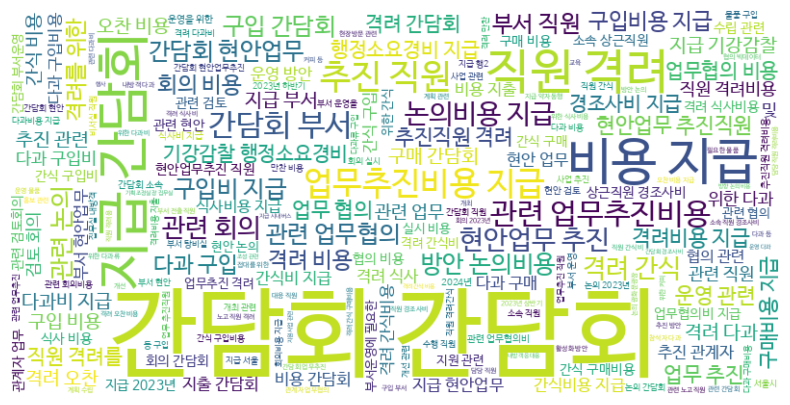

In [45]:
# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path
                     ).generate(" ".join(df["집행목적_전처리"].tolist()))

# 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()